In [1]:
datasetName = 'eye_retina_Voigt2019_macula'
#datasetName value: organ_tissue_authorYear without space
dataFormat = '10x'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/eye_retina_Voigt2019_macula")

In [5]:
library(Matrix)
matrix_dir = "/stor/public/hcad/eye_retina_Voigt2019_macula/eye_retina_Voigt2019_macula_expression/"
barcode.path <- paste0(matrix_dir, "barcodes.tsv")
features.path <- paste0(matrix_dir, "genes.tsv")
matrix.path <- paste0(matrix_dir, "matrix.mtx")
data.matrix <- as.matrix(readMM(file = matrix.path))
feature.names = read.delim(features.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
barcode.names = read.delim(barcode.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
colnames(data.matrix) = barcode.names$V1
rownames(data.matrix) = feature.names$V1

In [6]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
# if(dataFormat == 'tsv'){
#     data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
# } else{
#    system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
#    data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
#    # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
# }
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}


In [7]:
data.matrix
data.metadata[1:5, ]
data.annotation[1:5,]

,AAACCCATCAAGGTGG-1,AAACCCATCTCTCTTC-1,AAAGGATAGTTCCGGC-1,AAAGGGCAGACAGCTG-1,AAAGGTATCTGGAAGG-1,AAAGTCCCAAGGATGC-1,AAATGGACATAGAAAC-1,AAATGGATCCCATTCG-1,AAATGGATCTGCTGAA-1,AACAAGAGTAATGATG-1,⋯,TTTAGTCCAACCGACC-3,TTTAGTCTCCTAAGTG-3,TTTATGCCAATGTCAC-3,TTTCCTCCACAGGATG-3,TTTCCTCCATGGCCCA-3,TTTCGATTCCACGTAA-3,TTTGATCAGTGCCAGA-3,TTTGGAGCATCTGGGC-3,TTTGGTTTCGGAATTC-3,TTTGTTGCATCTCATT-3
RP11-34P13.7,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP11-34P13.8,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
AL627309.1,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.8226335,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
AP006222.2,0,0.5761528,0,0,1.265405,0,0,0.0000000,0.0000000,1.11446,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP4-669L17.10,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP5-857K21.4,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP11-206L10.3,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP11-206L10.2,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
RP11-206L10.9,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0
FAM87B,0,0.0000000,0,0,0.000000,0,0,0.0000000,0.0000000,0.00000,⋯,0.0000000,0,0.000000,0,0.0000000,0,0,0.000000,0.000000,0


,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<lgl>,<fct>,<int>,<fct>,<int>
AAACCCATCAAGGTGG-1,retina,macula,NA,macula degeneration,1,M,54
AAACCCATCTCTCTTC-1,retina,macula,NA,macula degeneration,1,M,54
AAAGGATAGTTCCGGC-1,retina,macula,NA,macula degeneration,1,M,54
AAAGGGCAGACAGCTG-1,retina,macula,NA,macula degeneration,1,M,54
AAAGGTATCTGGAAGG-1,retina,macula,NA,macula degeneration,1,M,54


[1] CD2-expressing T cells/NK cell macrophage                    
[3] CD2-expressing T cells/NK cell CD2-expressing T cells/NK cell
[5] CD2-expressing T cells/NK cell
11 Levels: CD2-expressing T cells/NK cell ... RPE

In [8]:
# Pre-processing
min.cells = 3
min.features = 500
nFeature_RNA_range = c(500, 7000)
percent.mt.thre = 5
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

In [9]:
# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)


In [10]:
# Normalization
# Two approaches
# 1. run standard log normalization 
# dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj, selection.method = 'vst', nfeatures = 2000) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [11]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  IFITM3, IGFBP7, KLF4, GSN, CLU, SERPING1, EGR1, CRYAB, FOSB, FOS 
	   ATF3, TIMP3, RARRES2, RHOB, GPX3, C1R, SPARC, MAP1B, CYR61, SOX4 
	   CST3, JUN, NR4A1, C1S, ID4, HSPA1B, ID1, CD9, VIM, FXYD1 
Negative:  PTPRC, CXCR4, CCL5, CST7, CD53, CD48, SRGN, HCST, CDC42SE2, RUNX3 
	   ARHGDIB, IL32, CYTIP, NKG7, GZMA, LCP1, CD97, CORO1A, EVI2B, TGFB1 
	   CD37, PTPRCAP, SAMSN1, CD52, CD3D, IL2RG, CD2, CREM, SLC38A1, ARL4C 
PC_ 2 
Positive:  FBLN1, MGP, GGT5, EFEMP1, IGFBP5, FOXC1, IGF2, CYP1B1, RARRES1, FHL2 
	   MGST1, TGM2, CFH, PCOLCE, C3, APOD, LEPR, MFAP4, BMP5, LTBP2 
	   CP, TAGLN, SCARA5, RAMP2, FAM107A, STOM, IGFBP6, ADH1B, RBP4, S1PR3 
Negative:  CDH19, LGI4, NRXN1, PLP1, SCN7A, GPM6B, ALDH1A1, S100A10, C1QL1, CHL1 
	   KCNMB4, CADM3, SAMHD1, ITGB4, MYOT, VWA1, CD9, S100B, SOX2, SPP1 
	   FXYD1, L1CAM, NPTX2, AHR, NGFR, CADM2, NRN1, CD74, GAS7, GPR155 
PC_ 3 
Positive:  PMEL, MLANA, TYRP1, TRPM1, MLPH, RP11-93B14.5, MITF, CRTAC1, EDNRB, QPCT 
	   CHCHD6, DCT, ABCB

Warning message in ElbowPlot(dataobj, ndims = 80):
“The object only has information for 50 reductions”


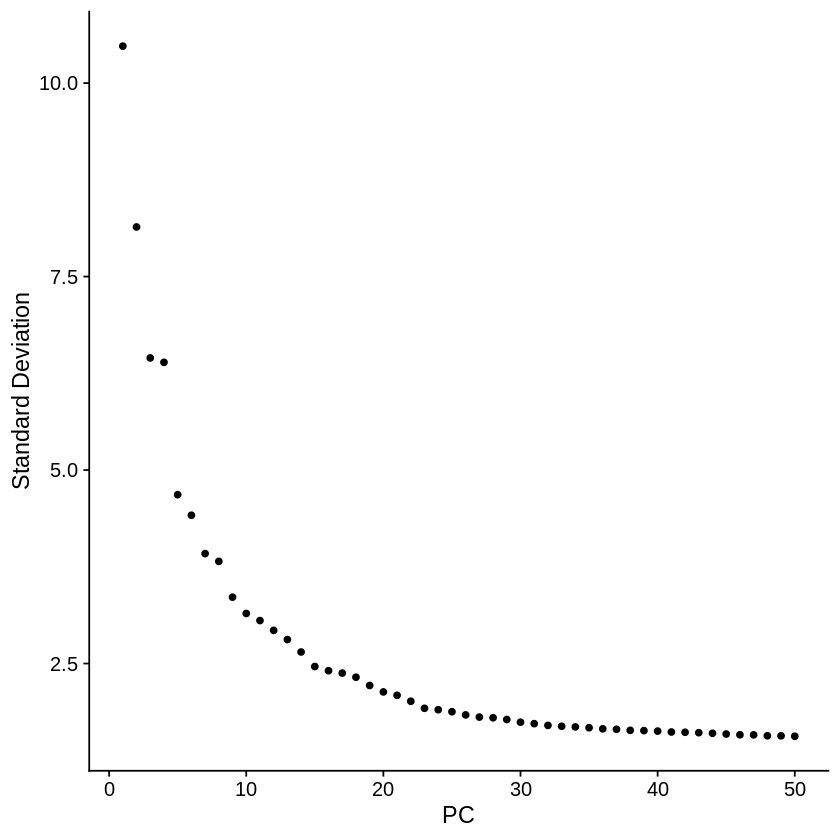

In [12]:
ElbowPlot(dataobj, ndims = 80) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [13]:
dev.off()
pcDim = 20 # set as 75 in this case 
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
DimPlot(dataobj, reduction = "umap", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:27:19 UMAP embedding parameters a = 0.9922 b = 1.112

07:27:19 Read 1926 rows and found 20 numeric columns

07:27:19 Using Annoy for neighbor search, n_neighbors = 30

07:27:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

07:27:19 Writing NN index file to temp file /tmp/RtmpUAn5jA/file327b28e388ad

07:27:19 Searching Annoy index using 1 thread, search_k = 3000

07:27:20 Annoy recall = 100%

07:27:20 Commencing smooth kNN distance calibration using 1 thread

07:27:20 Initializing fr

In [14]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.5, n.start = 5)
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1926
Number of edges: 58201

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.9200
Number of communities: 13
Elapsed time: 0 seconds


07:27:25 UMAP embedding parameters a = 0.9922 b = 1.112

07:27:25 Read 1926 rows and found 20 numeric columns

07:27:25 Using Annoy for neighbor search, n_neighbors = 30

07:27:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

07:27:26 Writing NN index file to temp file /tmp/RtmpUAn5jA/file327b6e63ca78

07:27:26 Searching Annoy index using 1 thread, search_k = 3000

07:27:26 Annoy recall = 100%

07:27:26 Commencing smooth kNN distance calibration using 1 thread

07:27:27 Initializing from normalized Laplacian + noise

07:27:27 Commencing optimization for 500 epochs, with 74758 positive edges

07:27:31 Optimization finished



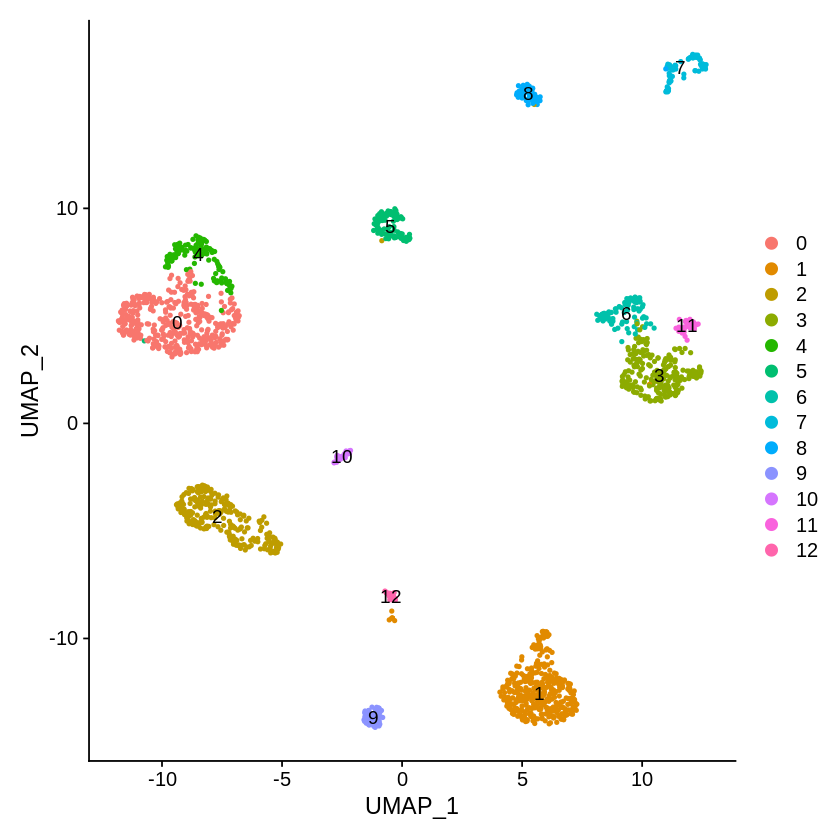

In [15]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

In [16]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

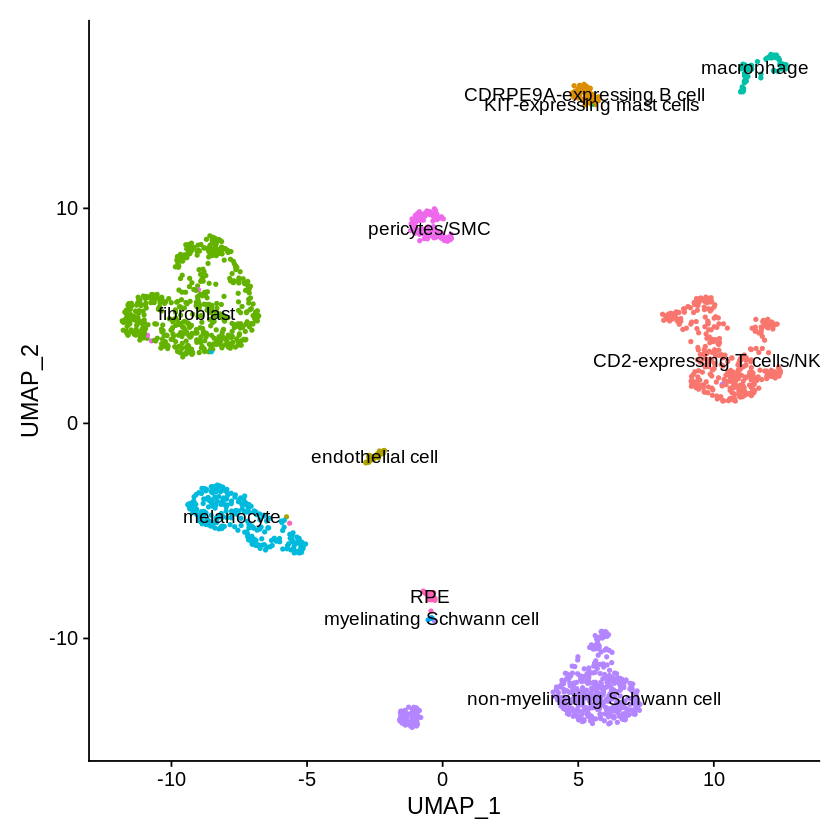

In [17]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", group.by = 'cell_cluster', label = TRUE) + NoLegend()
p_umap2

In [18]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

In [19]:
new.cluster.ids <- c('Eye-Connective tissue-Fibroblast-IGF2', 'Eye-Nerve tissue-Schwann cell-PLP1', 'Eye-Epithelial tissue-Melanocyte-PLP1',
                    'Eye-Connective tissue-CD2-expressing T cell/NK cell-CD2', 'Eye-Connective tissue-Fibroblast-IGF2', 'Eye-Connective tissue-Pericyte/Smooth muscle cell-ACTA2',
                    'Eye-Connective tissue-CD2-expressing T cell/NK cell-CD2', 'Eye-Nerve tissue-Microglia-AIF1', 'Eye-Connective tissue-B cell-CD79A', 
                    'Eye-Nerve tissue-Schwann cell-PLP1', 'Eye-Epithelial tissue-Endothelial cell-VWF', 'Eye-Connective tissue-CD2-expressing T cell/NK cell-CD2',
                    'Eye-Epithelial tissue-Retinal pigment epithelium-RPE65')
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

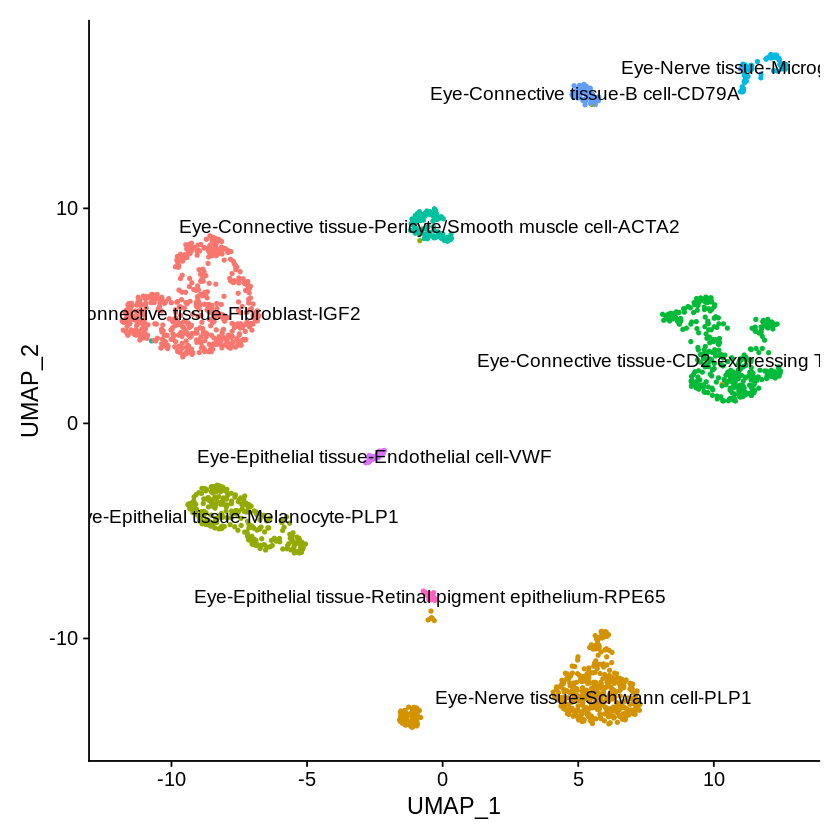

In [20]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE) + NoLegend()
p_umap2

In [21]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap2, width = 8, height = 5)

In [22]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



In [16]:
annotation <- as.data.frame(cbind(colnames(data.matrix)[colnames(data.matrix) %in% labels(Idents(dataobj))], as.character(data.annotation[colnames(data.matrix) %in% labels(Idents(dataobj)), ]), seurat_cluster = as.character(Idents(dataobj))))
annotation <- annotation[, -1]
annotation <- annotation[order(annotation$seurat_cluster), ]
print(annotation)

                                 V2 seurat_cluster
34                       fibroblast              0
91                       fibroblast              0
192                      fibroblast              0
292                      fibroblast              0
344                      fibroblast              0
382                      fibroblast              0
389                      fibroblast              0
473                      fibroblast              0
478                      fibroblast              0
481                      fibroblast              0
483                      fibroblast              0
493                      fibroblast              0
498                      fibroblast              0
503                      fibroblast              0
510                      fibroblast              0
511                      fibroblast              0
512                      fibroblast              0
514                      fibroblast              0
515                      fibrob

In [22]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))